# IPL win prediction
- dataset used -> [IPL_Complete_Dataset(2008-2020)](https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020)

In [2]:
# importing libraries
import pandas as pd
import numpy as np

> The dataset contains two files, one has information about the matches from 2008 to 2020 and the second has per ball information about the matches mentioned in the first file.

In [3]:
df1 = pd.read_csv("./IPL_Complete_Dataset(2008-2020)/IPL Ball-by-Ball 2008-2020.csv")
print(df1.shape)
df1.head()

(193468, 18)


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
df2 = pd.read_csv("./IPL_Complete_Dataset(2008-2020)/IPL Matches 2008-2020.csv")
print(df2.shape)
df2.head()

(816, 17)


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
# Merging both the datasets according to id
df = df1.merge(df2, on='id')
print(df.shape)
df.head()

(193468, 34)


,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,...,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen


In [6]:
# Dtype info about the features present
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193468 entries, 0 to 193467
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                193468 non-null  int64  
 1   inning            193468 non-null  int64  
 2   over              193468 non-null  int64  
 3   ball              193468 non-null  int64  
 4   batsman           193468 non-null  object 
 5   non_striker       193468 non-null  object 
 6   bowler            193468 non-null  object 
 7   batsman_runs      193468 non-null  int64  
 8   extra_runs        193468 non-null  int64  
 9   total_runs        193468 non-null  int64  
 10  non_boundary      193468 non-null  int64  
 11  is_wicket         193468 non-null  int64  
 12  dismissal_kind    9495 non-null    object 
 13  player_dismissed  9495 non-null    object 
 14  fielder           6784 non-null    object 
 15  extras_type       10233 non-null   object 
 16  batting_team      19

In [7]:
df.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team', 'city', 'date', 'player_of_match',
       'venue', 'neutral_venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'eliminator',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
# dropping some columns which I decided not to consider or are irrelivent. 
df.drop(['date', 
         'city',
         'player_of_match',
         'neutral_venue',
         'toss_winner',
         'toss_decision',
         'method', 
         'umpire1', 
         'umpire2',
         'batsman', 
         'non_striker', 
         'bowler', 
         'batsman_runs',
         'extra_runs',
         'result', 
         'non_boundary',
         'eliminator',
         'result_margin',
         'dismissal_kind', 
         'player_dismissed', 
         'fielder', 
         'extras_type'], axis='columns', inplace=True)

In [9]:
# Viewing the columns i decided to keep
df

,id,inning,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner
0,335982,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
1,335982,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
2,335982,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
3,335982,1,7,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
4,335982,1,7,3,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,0,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians
193464,1237181,1,12,6,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians
193465,1237181,1,13,1,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians
193466,1237181,1,13,2,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians


In [10]:
# We have runs scored on every ball. We can sum the runs for a particular inning for a particular match(id) to get the total runs scored till that ball.
data = df.groupby(['id', 'inning']).sum()['total_runs']
data

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3111963580.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby(['id', 'inning']).sum()['total_runs']


id       inning
335982   1         222
         2          82
335983   1         240
         2         207
335984   1         129
                  ... 
1237178  2         132
1237180  1         189
         2         172
1237181  1         156
         2         157
Name: total_runs, Length: 1630, dtype: int64

In [11]:
data = data.reset_index()
data

,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1625,1237178,2,132
1626,1237180,1,189
1627,1237180,2,172
1628,1237181,1,156


We can get the target for 2nd innings from the total runs scored in first inning

In [12]:
data = data[data['inning'] == 1]
data

,id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1620,1216547,1,201
1622,1237177,1,200
1624,1237178,1,131
1626,1237180,1,189


In [13]:
data['target'] = data['total_runs']+1
data.drop(['total_runs'], axis='columns', inplace=True)
data

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\1565170818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['total_runs']+1
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\1565170818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['total_runs'], axis='columns', inplace=True)


,id,inning,target
0,335982,1,223
2,335983,1,241
4,335984,1,130
6,335985,1,166
8,335986,1,111
...,...,...,...
1620,1216547,1,202
1622,1237177,1,201
1624,1237178,1,132
1626,1237180,1,190


In [14]:
# adding the target column to the main dataframe
df = df.merge(data, on='id')
df

,id,inning_x,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner,inning_y,target
0,335982,1,6,5,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
1,335982,1,6,6,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
2,335982,1,7,1,0,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
3,335982,1,7,2,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
4,335982,1,7,3,1,0,Kolkata Knight Riders,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,0,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
193464,1237181,1,12,6,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
193465,1237181,1,13,1,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157
193466,1237181,1,13,2,1,0,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,Mumbai Indians,Mumbai Indians,1,157


In [15]:
# Since we have the target from the first innings, we keep only the second innings data
df = df[df['inning_x'] == 2]
df.head()

,id,inning_x,over,ball,total_runs,is_wicket,batting_team,bowling_team,venue,team1,team2,winner,inning_y,target
121,335982,2,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
122,335982,2,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
123,335982,2,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
124,335982,2,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
125,335982,2,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223


In [16]:
# Renaming for better understanding
df.rename(columns={'total_runs' : 'runs_on_this_ball'}, inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2803026652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'total_runs' : 'runs_on_this_ball'}, inplace=True)


In [17]:
df.head()

,id,inning_x,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,team1,team2,winner,inning_y,target
121,335982,2,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
122,335982,2,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
123,335982,2,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
124,335982,2,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223
125,335982,2,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,1,223


In [18]:
# Dropping irrelevent columns
df.drop(['inning_x', 'team1', 'team2', 'inning_y'], axis='columns', inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3522514564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['inning_x', 'team1', 'team2', 'inning_y'], axis='columns', inplace=True)


In [19]:
df.head()

,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223


Now we have to look at the catagorical features and how we can encode them

In [20]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [21]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [22]:
# There are some obsolete teams and some teams whose franchise have changed. We will drop obsolete teams and replace other with their current names.

df['batting_team'] = df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
df['batting_team'] = df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['bowling_team'] = df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')
df['bowling_team'] = df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2446877893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_team'] = df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2446877893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['batting_team'] = df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2446877893.py:5: SettingWithCopyWarning: 
A value is t

In [23]:
df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Pune Warriors',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [24]:
df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Lions', 'Rising Pune Supergiant'], dtype=object)

In [25]:
obsolete_teams = ['Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Rising Pune Supergiant'
                  'Gujarat Lions']

for team in obsolete_teams:
        df.drop(df[df['batting_team'] == team].index, inplace=True)
        df.drop(df[df['bowling_team'] == team].index, inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\1564019559.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['batting_team'] == team].index, inplace=True)
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\1564019559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['bowling_team'] == team].index, inplace=True)


In [26]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [27]:
df.drop(df[df.batting_team=='Kochi Tuskers Kerala'].index,inplace=True)
df.drop(df[df.batting_team=='Pune Warriors'].index,inplace=True)
df.drop(df[df.batting_team=='Rising Pune Supergiants'].index,inplace=True)
df.drop(df[df.batting_team== 'Gujarat Lions'].index,inplace=True)
df.drop(df[df.batting_team=='Rising Pune Supergiant'].index,inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2746261700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.batting_team=='Kochi Tuskers Kerala'].index,inplace=True)
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2746261700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.batting_team=='Pune Warriors'].index,inplace=True)
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2746261700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [28]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [29]:
df.drop(df[df.bowling_team=='Kochi Tuskers Kerala'].index,inplace=True)
df.drop(df[df.bowling_team=='Pune Warriors'].index,inplace=True)
df.drop(df[df.bowling_team=='Rising Pune Supergiants'].index,inplace=True)
df.drop(df[df.bowling_team== 'Gujarat Lions'].index,inplace=True)
df.drop(df[df.bowling_team=='Rising Pune Supergiant'].index,inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\736647785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.bowling_team=='Kochi Tuskers Kerala'].index,inplace=True)
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\736647785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df.bowling_team=='Pune Warriors'].index,inplace=True)
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\736647785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [30]:
df['bowling_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Capitals'], dtype=object)

In [31]:
# Null values if any
df.isnull().sum()

id                    0
over                  0
ball                  0
runs_on_this_ball     0
is_wicket             0
batting_team          0
bowling_team          0
venue                 0
winner               27
target                0
dtype: int64

In [32]:
df[df['winner'].isnull()]

,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target
121187,829813,0,1,0,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
121188,829813,0,2,1,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
121189,829813,0,3,0,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
121190,829813,0,4,0,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
121191,829813,0,5,0,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
121192,829813,0,6,1,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
121193,829813,1,1,0,0,Royal Challengers Bangalore,Delhi Capitals,M Chinnaswamy Stadium,NaN,188
176322,1178424,0,1,0,0,Rajasthan Royals,Royal Challengers Bangalore,M.Chinnaswamy Stadium,NaN,63
176323,1178424,0,2,6,0,Rajasthan Royals,Royal Challengers Bangalore,M.Chinnaswamy Stadium,NaN,63
176324,1178424,0,3,4,0,Rajasthan Royals,Royal Challengers Bangalore,M.Chinnaswamy Stadium,NaN,63


There are some mathces which were cancled and no winner was declared. Like RCB vs DC 2015 match in M Chinnaswamy Stadium was called off due to heavy rains. We can just drop these rows

In [33]:
df.dropna(inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [34]:
df.isnull().sum()

id                   0
over                 0
ball                 0
runs_on_this_ball    0
is_wicket            0
batting_team         0
bowling_team         0
venue                0
winner               0
target               0
dtype: int64

In [35]:
df.head()

,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223


In [36]:
# since we have the overs and balls in separate columns, we can combine them to get the ball number
df['ball_number'] = (df['over'])*6 + df['ball']
df.head()

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2866807584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_number'] = (df['over'])*6 + df['ball']


,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target,ball_number
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,38
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,39
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,40
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,41
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,42


In [37]:
# Same with the wickets, we can sum up the wickets to get the wickets lost till that ball
temp = df[['id', 'runs_on_this_ball', 'is_wicket']]
temp.head()

,id,runs_on_this_ball,is_wicket
121,335982,0,0
122,335982,1,0
123,335982,1,0
124,335982,1,0
125,335982,0,0


In [38]:
temp = temp.groupby('id').cumsum()

In [39]:
# Renaming the columns
temp.rename(columns={'runs_on_this_ball':'runs', 'is_wicket': 'wickets'}, inplace=True)
temp

,runs,wickets
121,0,0
122,1,0
123,2,0
124,3,0
125,3,0
...,...,...
193372,154,4
193373,155,4
193374,156,4
193375,156,5


In [40]:
temp.reset_index()

,index,runs,wickets
0,121,0,0
1,122,1,0
2,123,2,0
3,124,3,0
4,125,3,0
...,...,...,...
80309,193372,154,4
80310,193373,155,4
80311,193374,156,4
80312,193375,156,5


In [41]:
df.reset_index()

,index,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target,ball_number
0,121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,38
1,122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,39
2,123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,40
3,124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,41
4,125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,42
...,...,...,...,...,...,...,...,...,...,...,...,...
80309,193372,1237181,17,6,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,108
80310,193373,1237181,18,1,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,109
80311,193374,1237181,18,2,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,110
80312,193375,1237181,18,3,0,1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,111


In [42]:
# adding the columns to the main dataframe
df[['runs', 'wickets']] = temp[['runs', 'wickets']]
df

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3935299920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['runs', 'wickets']] = temp[['runs', 'wickets']]
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3935299920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['runs', 'wickets']] = temp[['runs', 'wickets']]


,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target,ball_number,runs,wickets
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,38,0,0
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,39,1,0
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,40,2,0
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,41,3,0
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,42,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,17,6,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,108,154,4
193373,1237181,18,1,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,109,155,4
193374,1237181,18,2,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,110,156,4
193375,1237181,18,3,0,1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,111,156,5


In [43]:
df['balls_left'] = 120 - df['ball_number']
df['runs_to_bat'] = df['target'] - df['runs']
df

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2129642303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['ball_number']
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2129642303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs_to_bat'] = df['target'] - df['runs']


,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target,ball_number,runs,wickets,balls_left,runs_to_bat
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,38,0,0,82,223
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,39,1,0,81,222
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,40,2,0,80,221
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,41,3,0,79,220
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,42,3,0,78,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,17,6,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,108,154,4,12,3
193373,1237181,18,1,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,109,155,4,11,2
193374,1237181,18,2,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,110,156,4,10,1
193375,1237181,18,3,0,1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,111,156,5,9,1


In [44]:
df['wickets_left'] = 10-df['wickets']
df

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\1767704558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wickets_left'] = 10-df['wickets']


,id,over,ball,runs_on_this_ball,is_wicket,batting_team,bowling_team,venue,winner,target,ball_number,runs,wickets,balls_left,runs_to_bat,wickets_left
121,335982,6,2,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,38,0,0,82,223,10
122,335982,6,3,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,39,1,0,81,222,10
123,335982,6,4,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,40,2,0,80,221,10
124,335982,6,5,1,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,41,3,0,79,220,10
125,335982,6,6,0,0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,42,3,0,78,220,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,17,6,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,108,154,4,12,3,6
193373,1237181,18,1,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,109,155,4,11,2,6
193374,1237181,18,2,1,0,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,110,156,4,10,1,6
193375,1237181,18,3,0,1,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,111,156,5,9,1,5


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80314 entries, 121 to 193376
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 80314 non-null  int64 
 1   over               80314 non-null  int64 
 2   ball               80314 non-null  int64 
 3   runs_on_this_ball  80314 non-null  int64 
 4   is_wicket          80314 non-null  int64 
 5   batting_team       80314 non-null  object
 6   bowling_team       80314 non-null  object
 7   venue              80314 non-null  object
 8   winner             80314 non-null  object
 9   target             80314 non-null  int64 
 10  ball_number        80314 non-null  int64 
 11  runs               80314 non-null  int64 
 12  wickets            80314 non-null  int64 
 13  balls_left         80314 non-null  int64 
 14  runs_to_bat        80314 non-null  int64 
 15  wickets_left       80314 non-null  int64 
dtypes: int64(12), object(4)
memory usage:

In [46]:
# Dropping the columns which are not required since they have been modified to get the relevant information
df.drop(['over','ball','runs_on_this_ball','is_wicket','ball_number','wickets'], axis='columns', inplace=True)
df

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\2606585863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['over','ball','runs_on_this_ball','is_wicket','ball_number','wickets'], axis='columns', inplace=True)


,id,batting_team,bowling_team,venue,winner,target,runs,balls_left,runs_to_bat,wickets_left
121,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,0,82,223,10
122,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,81,222,10
123,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,2,80,221,10
124,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,3,79,220,10
125,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,3,78,220,10
...,...,...,...,...,...,...,...,...,...,...
193372,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,154,12,3,6
193373,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,155,11,2,6
193374,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,156,10,1,6
193375,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,Mumbai Indians,157,156,9,1,5


In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
# Encoding the winner catagory
def result(row):
    if row['winner'] == row['batting_team']:
        return 1
    else:
        return 0

df['result'] = df.apply(result, axis=1)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3729399506.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result'] = df.apply(result, axis=1)


In [49]:
df.head()

,id,batting_team,bowling_team,venue,winner,target,runs,balls_left,runs_to_bat,wickets_left,result
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,0,82,223,10,0
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,1,81,222,10,0
2,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,2,80,221,10,0
3,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,3,79,220,10,0
4,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Kolkata Knight Riders,223,3,78,220,10,0


In [50]:
df.drop(['winner'], axis='columns', inplace=True)

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\562605532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['winner'], axis='columns', inplace=True)


In [51]:
df.head()

,id,batting_team,bowling_team,venue,target,runs,balls_left,runs_to_bat,wickets_left,result
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,0,82,223,10,0
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,1,81,222,10,0
2,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,2,80,221,10,0
3,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,79,220,10,0
4,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,78,220,10,0


Now we are left with encoding the teams and venue places

In [52]:
sorted(df['venue'].unique())

['Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Feroz Shah Kotla',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'M.Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'Subrata Roy Sahara Stadium',
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, J

In [53]:
# Updating the stadium names with their current names
df['venue'] = df['venue'].str.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium')
df['venue'] = df['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali', 'Punjab Cricket Association Stadium, Mohali')
df['venue'] = df['venue'].str.replace('Subrata Roy Sahara Stadium', 'Maharashtra Cricket Association Stadium')
df['venue'] = df['venue'].str.replace('Feroz Shah Kotla', 'Arun Jaitley Cricket Stadium')

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\4160780287.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['venue'] = df['venue'].str.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium')
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\4160780287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['venue'] = df['venue'].str.replace('M.Chinnaswamy Stadium', 'M Chinnaswamy Stadium')
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\4160780287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [54]:
df.head()

,id,batting_team,bowling_team,venue,target,runs,balls_left,runs_to_bat,wickets_left,result
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,0,82,223,10,0
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,1,81,222,10,0
2,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,2,80,221,10,0
3,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,79,220,10,0
4,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,78,220,10,0


In [55]:
print(len(df['venue'].unique()))
sorted(df['venue'].unique())

30


['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [56]:
# adding run rates to the dataframe
# current run rate-
overs_played = (120-df['balls_left'])/6
df['crr'] = df['runs'] / overs_played
# required run rate-
overs_left = df['balls_left']/6
df['rrr'] = df['runs_to_bat'] / overs_left

C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3073017193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = df['runs'] / overs_played
C:\Users\praya\AppData\Local\Temp\ipykernel_25688\3073017193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rrr'] = df['runs_to_bat'] / overs_left


In [57]:
df

,id,batting_team,bowling_team,venue,target,runs,balls_left,runs_to_bat,wickets_left,result,crr,rrr
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,0,82,223,10,0,0.000000,16.317073
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,1,81,222,10,0,0.153846,16.444444
2,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,2,80,221,10,0,0.300000,16.575000
3,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,79,220,10,0,0.439024,16.708861
4,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,78,220,10,0,0.428571,16.923077
...,...,...,...,...,...,...,...,...,...,...,...,...
80309,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,157,154,12,3,6,1,8.555556,1.500000
80310,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,157,155,11,2,6,1,8.532110,1.090909
80311,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,157,156,10,1,6,1,8.509091,0.600000
80312,1237181,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,157,156,9,1,5,1,8.432432,0.666667


In [58]:
# The last ball of the innings is not required since we have the target
df[df['balls_left']==0]

,id,batting_team,bowling_team,venue,target,runs,balls_left,runs_to_bat,wickets_left,result,crr,rrr
182,335983,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",241,131,0,110,7,0,6.55,inf
853,335989,Mumbai Indians,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",209,116,0,93,6,0,5.80,inf
1099,335991,Mumbai Indians,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",183,75,0,108,5,0,3.75,inf
1916,335998,Royal Challengers Bangalore,Delhi Capitals,Arun Jaitley Cricket Stadium,192,178,0,14,5,0,8.90,inf
2509,336003,Kolkata Knight Riders,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",179,161,0,18,4,0,8.05,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
78929,1216540,Kolkata Knight Riders,Royal Challengers Bangalore,Sharjah Cricket Stadium,195,31,0,164,7,0,1.55,inf
79266,1216543,Rajasthan Royals,Delhi Capitals,Dubai International Cricket Stadium,162,28,0,134,8,0,1.40,inf
79738,1216547,Mumbai Indians,Royal Challengers Bangalore,Dubai International Cricket Stadium,202,93,0,109,8,0,4.65,inf
79836,1237177,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,201,0,0,201,6,0,0.00,inf


In [59]:
final_df = df[df['balls_left']!=0]
final_df.head()

,id,batting_team,bowling_team,venue,target,runs,balls_left,runs_to_bat,wickets_left,result,crr,rrr
0,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,0,82,223,10,0,0.000000,16.317073
1,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,1,81,222,10,0,0.153846,16.444444
2,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,2,80,221,10,0,0.300000,16.575000
3,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,79,220,10,0,0.439024,16.708861
4,335982,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,3,78,220,10,0,0.428571,16.923077


In [60]:
final_df.isnull().sum()

id              0
batting_team    0
bowling_team    0
venue           0
target          0
runs            0
balls_left      0
runs_to_bat     0
wickets_left    0
result          0
crr             0
rrr             0
dtype: int64

In [61]:
final_df = final_df[['batting_team','bowling_team','venue','runs_to_bat','balls_left','wickets_left','target','crr','rrr','result']]
final_df

,batting_team,bowling_team,venue,runs_to_bat,balls_left,wickets_left,target,crr,rrr,result
0,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,223,82,10,223,0.000000,16.317073,0
1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,222,81,10,223,0.153846,16.444444,0
2,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,221,80,10,223,0.300000,16.575000,0
3,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,220,79,10,223,0.439024,16.708861,0
4,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,220,78,10,223,0.428571,16.923077,0
...,...,...,...,...,...,...,...,...,...,...
80309,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,3,12,6,157,8.555556,1.500000,1
80310,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,2,11,6,157,8.532110,1.090909,1
80311,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,1,10,6,157,8.509091,0.600000,1
80312,Mumbai Indians,Delhi Capitals,Dubai International Cricket Stadium,1,9,5,157,8.432432,0.666667,1


In [74]:
final_df.batting_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad'], dtype=object)

In [63]:
final_df["venue"].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali',
       'Arun Jaitley Cricket Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Ho

In [64]:
import json

In [65]:
fixtures = json.loads(open('fixtures.json').read())

In [70]:
fixtures

{'results': [{'id': 2718963,
   'series_id': 1430,
   'venue': 'Narendra Modi Stadium, Ahmedabad (night)',
   'date': '2023-03-31T14:00:00+00:00',
   'status': 'Complete',
   'result': 'Titans won by 5 wkts (4b rem)',
   'match_title': 'Gujarat Titans v Chennai Super Kings at Narendra Modi Stadium, Ahmedabad (night), T20.',
   'match_subtitle': '1st Match',
   'home': {'id': 161268, 'name': 'Gujarat Titans', 'code': ''},
   'away': {'id': 101742, 'name': 'Chennai Super Kings', 'code': 'CSK'}},
  {'id': 2718965,
   'series_id': 1430,
   'venue': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (day/night)',
   'date': '2023-04-01T10:00:00+00:00',
   'status': 'Complete',
   'result': 'Punjab Kings won by 7 runs (DLS)',
   'match_title': 'Punjab Kings v Kolkata Knight Riders at Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (day/night), T20.',
   'match_subtitle': '2nd Match',
   'home': {'id': 145221, 'name': 'Punjab Kings', 'code': ''},
   'away': {'i

In [71]:
cities = dict()
for match in fixtures["results"]:
    cities[match["venue"]] = match["venue"].split(",")[-1].split(" ")[1]

In [72]:
cities

{'Narendra Modi Stadium, Ahmedabad (night)': 'Ahmedabad',
 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (day/night)': 'Chandigarh',
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow (night)': 'Lucknow',
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad (day/night)': 'Hyderabad',
 'M Chinnaswamy Stadium, Bengaluru (night)': 'Bengaluru',
 'MA Chidambaram Stadium, Chepauk, Chennai (night)': 'Chennai',
 'Arun Jaitley Stadium, Delhi (night)': 'Delhi',
 'Barsapara Cricket Stadium, Guwahati (night)': 'Guwahati',
 'Eden Gardens, Kolkata (night)': 'Kolkata',
 'Barsapara Cricket Stadium, Guwahati (day/night)': 'Guwahati',
 'Wankhede Stadium, Mumbai (night)': 'Mumbai',
 'Narendra Modi Stadium, Ahmedabad (day/night)': 'Ahmedabad',
 'Rajiv Gandhi International Stadium, Uppal, Hyderabad (night)': 'Hyderabad',
 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh (night)': 'Chandigarh',
 'M Chinnaswamy Stadium, Bengaluru (day/night)': 'Beng

In [78]:
dataset_venues = {  'M Chinnaswamy Stadium': 'Bengaluru',
                    'Punjab Cricket Association Stadium, Mohali': 'Mohali',
                    'Arun Jaitley Cricket Stadium' : 'Delhi', 
                    'Wankhede Stadium' : 'Mumbai', 
                    'Eden Gardens' : 'Kolkata',
                    'Sawai Mansingh Stadium' : 'Jaipur',
                    'Rajiv Gandhi International Stadium, Uppal' : 'Hyderabad',
                    'MA Chidambaram Stadium, Chepauk' : 'Chennai', 
                    'Dr DY Patil Sports Academy' : 'Mumbai',
                    'Newlands' : 'Cape Town',
                    "St George's Park" : 'Port Elizabeth', 
                    'Kingsmead' : 'Durban', 
                    'SuperSport Park' : 'Centurion',
                    'Buffalo Park' : 'East London', 
                    'New Wanderers Stadium' : 'Johannesburg', 
                    'De Beers Diamond Oval' : 'Kimberley',
                    'OUTsurance Oval' : 'Bloemfontein', 
                    'Brabourne Stadium' : 'Mumbai',
                    'Sardar Patel Stadium, Motera' : 'Ahmedabad', 
                    'Barabati Stadium' : 'Cuttack',
                    'Vidarbha Cricket Association Stadium, Jamtha' : 'Nagpur',
                    'Himachal Pradesh Cricket Association Stadium' : 'Dharamsala',
                    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium' : 'Visakhapatnam',
                    'Maharashtra Cricket Association Stadium' : 'Pune',
                    'Shaheed Veer Narayan Singh International Stadium' : 'Raipur',
                    'JSCA International Stadium Complex' : 'Ranchi', 
                    'Sheikh Zayed Stadium' : 'Abu Dhabi',
                    'Sharjah Cricket Stadium' : 'Sharjah', 
                    'Dubai International Cricket Stadium' : 'Dubai',
                    'Holkar Cricket Stadium' : 'Indore'}

In [104]:
dataset_cities = set(dataset_venues.values())
dataset_cities

{'Abu Dhabi',
 'Ahmedabad',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kimberley',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam'}

In [77]:
venues_to_drop = ['Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park', 'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval', 'OUTsurance Oval']

for venue in venues_to_drop:
    final_df = final_df[final_df['venue'] != venue]


NameError: name 'dataset_venues' is not defined

In [76]:
final_df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali',
       'Arun Jaitley Cricket Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium', 'Sardar Patel Stadium, Motera',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Holkar Cricket Stadium'], dtype=object)

In [79]:
City = [dataset_venues[venue] for venue in final_df['venue']]

In [81]:
final_df['city'] = City

In [105]:
final_df['city'].unique()

array(['Bengaluru', 'Mohali', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Ahmedabad', 'Cuttack', 'Nagpur',
       'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Indore'], dtype=object)

In [82]:
final_df = final_df[['batting_team','bowling_team','city','runs_to_bat','balls_left','wickets_left','target','crr','rrr','result']]

In [83]:
# Test train split
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [84]:
X_train

,batting_team,bowling_team,city,runs_to_bat,balls_left,wickets_left,target,crr,rrr
17567,Delhi Capitals,Kolkata Knight Riders,Kolkata,59,95,2,182,29.520000,3.726316
15319,Mumbai Indians,Chennai Super Kings,Mumbai,32,65,6,181,16.254545,2.953846
20904,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,70,63,2,176,11.157895,6.666667
51089,Rajasthan Royals,Chennai Super Kings,Chennai,54,105,2,158,41.600000,3.085714
58278,Delhi Capitals,Sunrisers Hyderabad,Delhi,164,104,10,186,8.250000,9.461538
...,...,...,...,...,...,...,...,...,...
27253,Kolkata Knight Riders,Kings XI Punjab,Mohali,65,25,9,125,3.789474,15.600000
28086,Mumbai Indians,Kings XI Punjab,Mohali,83,11,7,169,4.733945,45.272727
80169,Sunrisers Hyderabad,Delhi Capitals,Abu Dhabi,56,62,4,190,13.862069,5.419355
56797,Mumbai Indians,Royal Challengers Bangalore,Bengaluru,90,50,5,143,4.542857,10.800000


In [89]:
# Data preprocessing and building the model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformation_step = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [91]:
# Lets us take both logistic regression and random forest and see which one performs better
pipe_log = Pipeline(steps=[
    ('step1', transformation_step),
    ('step2', LogisticRegression(solver='liblinear'))
])

pipe_forest = Pipeline(steps=[
    ('step1',transformation_step),
    ('step2',RandomForestClassifier())
])

In [92]:
pipe_forest.fit(X_train, y_train)
pipe_log.fit(X_train, y_train)

c:\Users\praya\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\praya\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [93]:
y_pred_log = pipe_log.predict(X_test)
y_pred_forest = pipe_forest.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_forest)

0.9993877134498945

In [95]:
accuracy_score(y_test, y_pred_log)

0.8181508946186815

> The randome forest classifier performs much better than logistic regression. This was also expected since this data is small and very natural for descision trees to fit.

> Let us see the predicted probabilities for firsst 20 values

In [96]:
pipe_log.predict_proba(X_test)[:20, :]

array([[9.15656526e-01, 8.43434745e-02],
       [5.14228611e-01, 4.85771389e-01],
       [6.08939198e-02, 9.39106080e-01],
       [8.85080199e-01, 1.14919801e-01],
       [9.82459152e-01, 1.75408481e-02],
       [3.82901541e-01, 6.17098459e-01],
       [7.79392484e-01, 2.20607516e-01],
       [5.40500560e-01, 4.59499440e-01],
       [9.16999131e-02, 9.08300087e-01],
       [9.99086881e-01, 9.13118511e-04],
       [9.83449935e-01, 1.65500651e-02],
       [8.20248735e-01, 1.79751265e-01],
       [9.33207938e-01, 6.67920619e-02],
       [1.15056069e-01, 8.84943931e-01],
       [4.53941255e-01, 5.46058745e-01],
       [9.91083393e-01, 8.91660651e-03],
       [3.35449549e-02, 9.66455045e-01],
       [6.49297143e-01, 3.50702857e-01],
       [1.24138814e-01, 8.75861186e-01],
       [1.83325572e-02, 9.81667443e-01]])

In [97]:
pipe_forest.predict_proba(X_test)[:20, :]

array([[1.  , 0.  ],
       [0.03, 0.97],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.02, 0.98],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.  , 1.  ]])

## Note-
One thing to notice here is that although the random forest classifier gives much better accuracy, the probabilities calculated by it are very extreme in all cases.
Such extreme probabilities is not suitable for any kind of audience or situation. So it will be better to got with logistic regreesion to display probabilities

In [98]:
# We create a pickle file to save the model
import pickle

pickle.dump(pipe_log, open('model.pkl', 'wb'))

In [99]:
X_test.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_to_bat', 'balls_left',
       'wickets_left', 'target', 'crr', 'rrr'],
      dtype='object')

# Experiments

In [138]:
sorted(final_df['venue'].unique())

['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [77]:
pipe = pickle.load(open('model.pkl', 'rb'))

In [78]:
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Mumbai Indians'],
            'venue': ['Wankhede Stadium'],
            'runs_to_bat': [30],
            'balls_left': [18],
            'wickets_left': [4],
            'target': [180],
            'crr': [150/17],
            'rrr': [30/3]
        })

In [79]:
pipe.predict_proba(input_df)

array([[0.69651172, 0.30348828]])

In [80]:
sorted(final_df['batting_team'].unique())

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [81]:
teams = ['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [82]:
type(teams)

list

In [85]:
teams

['Arun Jaitley Cricket Stadium',
 'Barabati Stadium',
 'Brabourne Stadium',
 'Buffalo Park',
 'De Beers Diamond Oval',
 'Dr DY Patil Sports Academy',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kingsmead',
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium, Chepauk',
 'Maharashtra Cricket Association Stadium',
 'New Wanderers Stadium',
 'Newlands',
 'OUTsurance Oval',
 'Punjab Cricket Association Stadium, Mohali',
 'Rajiv Gandhi International Stadium, Uppal',
 'Sardar Patel Stadium, Motera',
 'Sawai Mansingh Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'Sharjah Cricket Stadium',
 'Sheikh Zayed Stadium',
 "St George's Park",
 'SuperSport Park',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Wankhede Stadium']

In [86]:
import pandas as pd
input_df = pd.DataFrame({
            'batting_team': ['Chennai Super Kings'],
            'bowling_team': ['Delhi Capitals'],
            'venue': ['Arun Jaitley Cricket Stadium'],
            'runs_to_bat': [120],
            'balls_left': [12],
            'wickets_left': [9],
            'target': [132],
            'crr': [1],
            'rrr': [120/12]
        })

In [87]:
pipe_log.predict_proba(input_df)

array([[0.12775994, 0.87224006]])

In [2]:
import pandas as pd

plot = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\plot.csv")
plot.head()

,SRH,DC
0,64,36
1,67,33
2,71,29
3,75,25
4,78,22


In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
plot['index'] = np.array(range(1,21))

In [16]:
plot['DC'] = -1*plot['DC']

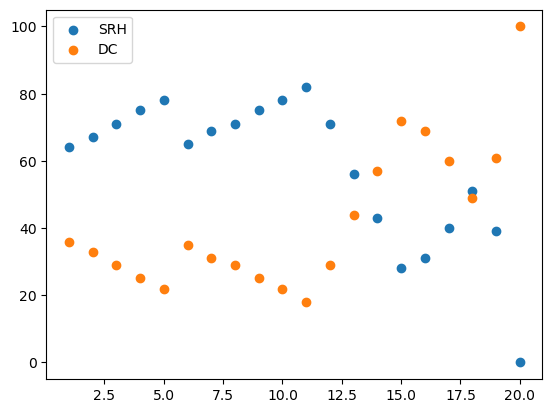

In [18]:
plt.scatter(plot['index'], plot['SRH'], label='SRH')
plt.scatter(plot['index'], plot['DC'], label='DC')
plt.legend()